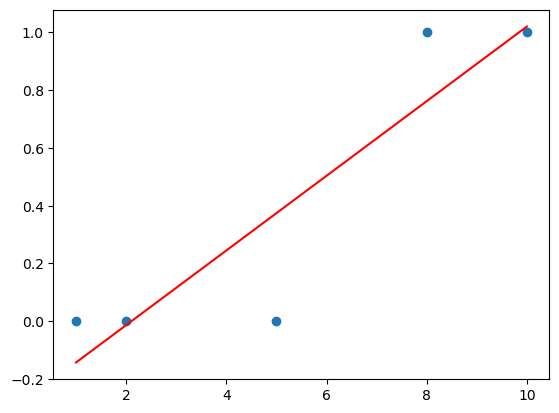

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Training Data Set
x_data = np.array([1, 2, 5, 8, 10]) # 공부시간
y_data = ['F','F','F','P','P'] # 합격여부 (둘 중 하나)
# 문자는 숫자연산이 안되니까 문자를 숫자로 임의 변경
y_data = np.array([0,0,0,1,1]) # F:0, P:1으로 변경


# 실제 데이터는 이진분류문제에 해당하는 데이터
# 먼저 이걸 기존에 했었던 Linear Regression으로 모델링
# 모델 생성
model = linear_model.LinearRegression() # 선형회귀모델을 생성
# 모델 학습
model.fit(x_data.reshape(-1,1),
          y_data.reshape(-1,1))
# 예측
result = model.predict(np.array([[7]]))

# 그래프를 하나 그려보면
plt.scatter(x_data,
            y_data)
plt.plot(x_data,
         x_data * model.coef_.ravel() + model.intercept_.ravel(),
         color = 'r')

[[0.41831972]]


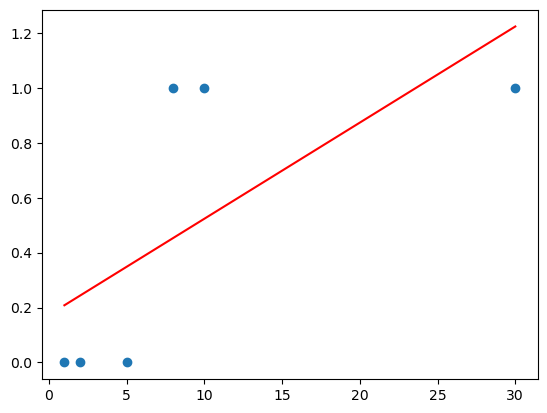

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# 데이터를 변경해보아요!

# Training Data Set
x_data = np.array([1, 2, 5, 8, 10, 30])  # 공부시간
# y_data = ['F', 'F', 'F', 'P', 'P'] # 합격여부(둘 중 하나)
# 문자는 숫자연산이 안되니까 문자를 숫자로 임의로 변경
y_data = np.array([0, 0, 0, 1, 1, 1]) # F : 0 , P : 1

# 실제 데이터는 이진분류문제에 해당하는 데이터예요!
# 먼저 이걸 기존에 했었던 Linear Regression으로 모델링해볼꺼예요!
# 모델 생성
model = linear_model.LinearRegression()  # 선형회귀모델을 생성
# 모델 학습
model.fit(x_data.reshape(-1,1),
          y_data.reshape(-1,1))
# 예측
result = model.predict(np.array([[7]]))
print(result)  # 0.63265306 (0.5보다 크면 1이라고 결론. 63%확률로 합격!)
               # 0.41831972 (데이터 변경 후)

# 그래프로 하나 그려보면
plt.scatter(x_data,
            y_data)
plt.plot(x_data,
         x_data * model.coef_.ravel() + model.intercept_.ravel(),
         color='r')

In [5]:
# 간단하게 Logistic Regression Model 구현
# 패키지 import
import numpy as np
import datetime

# sklearn
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

2025-10-27 16:44:23.454989: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-27 16:44:23.501682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-27 16:44:23.532070: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-27 16:44:23.532142: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-27 16:44:23.572435: I tensorflow/core/platform/cpu_feature_gua

In [6]:
# 1. Raw Data Loading
# Training Data Set (공부시간에 따른 합격여부)
x_data = np.arange(2,21,2).reshape(-1,1) # 독립변수 1개짜리
y_data = np.array([0,0,0,0,0,0,1,1,1,1]).reshape(-1,1) # 합격여부

# 결측치 -> 없음
# 이상치 -> 없음
# 정규화 -> 진행 필요
scaler_x = StandardScaler()
scaler_x.fit(x_data)  # 평균과 표준편차를 알아가기 위해서.
x_data_norm = scaler_x.transform(x_data)
x_data_norm

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [7]:
# sklearn으로 Logistic Regression을 구현
# 정답에 근사해요!
# 최소제곱법이라는 공식은 -> 선형모델에서만 사용이 가능

# 모델 생성
sklearn_model = linear_model.LogisticRegression() # 분류를 하는 Logistic을 사용

# 모델 학습
# y_data는 1차원으로 입력 (API가 그렇게 만들어져 있어요)
# 기존 Linear Regression에서는 2차원으로 입력했었어요!
sklearn_model.fit(x_data_norm,
                  y_data.ravel())

# 예측
# 내가 알고 싶은건 13시간 공부하면 합격하나요?
study_hour = np.array([[13]])
study_hour_norm = scaler_x.transform(study_hour)
predict_class = sklearn_model.predict(study_hour_norm)
print(f'예측한 class값 : {predict_class}') # 예측한 class값 : [0]
predict_proba = sklearn_model.predict_proba(study_hour_norm)
print(f'예측한 확률값 : {predict_proba}') # 예측한 확률값 : [[0.52273225 0.47726775]]

예측한 class값 : [0]
예측한 확률값 : [[0.52273225 0.47726775]]


In [8]:
# Tensorflow 구현
# 1. Model 생성
keras_model = Sequential()
# 2. Layer생성 및 추가
keras_model.add(Input(shape=(1,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))
# 3. Model compile 및 설정
keras_model.compile(optimizer=Adam(learning_rate=1e-3),
                    loss='binary_crossentropy')

# 4. TensorBoard용 로그 callback 설정
log_dir = './logs/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = TensorBoard(log_dir=log_dir,
                                   histogram_freq = 1)

# 5. Model 학습
keras_model.fit(x_data_norm,
                y_data,
                epochs=1000,
                callbacks=[tensorboard_callback],
                verbose=0)

In [9]:
# 6. 예측
keras_result = keras_model.predict(study_hour_norm)
keras_result # 0.5346663

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.53372276]], dtype=float32)

In [10]:
# PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. 데이터 PyTorch 텐서로 변환
x_tensor = torch.FloatTensor(x_data_norm).to(device)
y_tensor = torch.FloatTensor(y_data).to(device)

# 2. 모델 정의(class)
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out # 모델의 예측값
    
# 3. 모델 생성
torch_model = LogisticRegressionModel().to(device)

# 4. Loss, Optimizer 생성
criterion = nn.BCELoss()
optimizer = optim.Adam(torch_model.parameters(),
                       lr=1e-3)

# 5. 학습을 진행
epochs = 20000

for epoch in range(epochs):
    # 예측값 도출
    y_pred = torch_model(x_tensor)

    # 예측값과 정답을 비교해서 Loss 계산
    loss = criterion(y_pred, y_tensor)

    # 역전파를 이용한 가중치 update 처리
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [11]:
# 6. 예측
study_hour = np.array([[13]])
study_hour_norm = scaler_x.transform(study_hour)
test_data = torch.tensor(study_hour_norm,
                         dtype=torch.float32).to(device)
with torch.no_grad(): # 효율을 위해 사용
    torch_result = torch_model(test_data)
    print(torch_result) # 0.5000

tensor([[0.5001]])


## 연습문제

In [ ]:
# Admission 예제를 구현해 보아요!

# 1. 결측치 처리
# 우리가 처리하는 모델이 이진분류모델이다 보니
# 종속변수에 이상치가 거의 존재하지 않아요!
# 0과 1 이외의 다른값은 이상치가 아니라 아예 잘못된 값이예요!
# 종속변수의 이상치를 outlier라고 부르는데 이 outlier는 거의 존재하지 않아요!
# 그래서
# 독립변수에 대한 이상치를 처리해야 해요 -> leverage point를 처리해야 해요!

# 2. GRE, GPA는 value값이기 때문에 그냥 처리하면되는데
# RANK는 분류값이예요! => 그냥 숫자로 입력해서 학습하면 좋지 않아요!
# 그래서 one-hot encoding을 이용해서 처리할꺼예요! class가 4개이니까 4개의 컬럼으로
# 확장해서 데이터를 다시 표현할 꺼예요!

# 3. 정규화는 진행을 해야 겠죠!
# GRE, GPA 두개에 대해서만 정규화를 진행 -> 표준화를 이용해서 처리하면 될 듯 해요!


### 내 코드

In [22]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv('./data/admission.csv')

training_data_set = df[['gre','gpa', 'rank', 'admit']]

# 데이터 전처리
# 1. 결측치 처리 - 무조건 삭제
training_data_set = training_data_set.dropna(how='any')
print(training_data_set) # 116 rows × 2 columns

# 2. 이상치 처리 - Outliner 처리
# 종속변수인 admit에 이상치가 있으면 해당 행을 삭제
# zscore가 1.8 초과하거나 -1.8 미만인 데이터는 이상치로 간주
mask = np.abs(stats.zscore(training_data_set['admit'])) <= 1.8
training_data_set = training_data_set.loc[mask]
print(training_data_set) # 109 rows × 2 columns

# 학습데이터셋을 생성
x_data = training_data_set.drop('admit', axis=1, inplace=False).values
y_data = training_data_set['admit'].values.reshape(-1,1)

# 3. 정규화 (Normalization)
# 정규화 방식은 standardization(표준화)를 이용해서 처리
# 원래 값을 다른 값으로 변경해서 모델을 만들려고 해요
scaler_x = StandardScaler() # 독립변수용 scaler
scaler_y = StandardScaler() # 종속변수용 scaler

scaler_x.fit(x_data)
scaler_y.fit(y_data)
# scaler는 변환을 시켜주는 함수
# scaler는 평균, 표준편차를 알고 있어야 해요!
# 위의 코드는 scaler_x가 x_data에 대한 평균과 표준편차를 알아가는 코드

x_data_norm = scaler_x.transform(x_data)
y_data_norm = scaler_y.transform(y_data)

     gre   gpa  rank  admit
0    380  3.61     3      0
1    660  3.67     3      1
2    800  4.00     1      1
3    640  3.19     4      1
4    520  2.93     4      0
..   ...   ...   ...    ...
395  620  4.00     2      0
396  560  3.04     3      0
397  460  2.63     2      0
398  700  3.65     2      0
399  600  3.89     3      0

[400 rows x 4 columns]


### Tensorflow 구현

In [39]:
# 제공된 admission.csv를 이용해서
# 모델을 구현한 후 (3가지로 구현)

# 600, 3, 8 =>1  합격여부?


# Tensorflow 구현
# 1. Model 생성
keras_model = Sequential()
# 2. Layer생성 및 추가
keras_model.add(Input(shape=(3,)))
keras_model.add(Dense(units=1,
                      activation='sigmoid'))
# 3. Model compile 및 설정
keras_model.compile(optimizer=Adam(learning_rate=1e-3),
                    loss='binary_crossentropy')

# 4. TensorBoard용 로그 callback 설정
log_dir = './logs/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = TensorBoard(log_dir=log_dir,
                                   histogram_freq = 1)

# 5. Model 학습
keras_model.fit(x_data_norm,
                y_data,
                epochs=500,
                callbacks=[tensorboard_callback],
                verbose=0)

In [44]:
# 6. 예측
test_data = scaler_x.transform(np.array([[600,3.8,1]]))
keras_result = keras_model.predict(test_data)
keras_result # 0.5346663

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.57910454]], dtype=float32)

### Sklearn 구현

In [36]:
# 모델 생성
sklearn_model = linear_model.LogisticRegression() # 분류를 하는 Logistic을 사용

# 모델 학습
# y_data는 1차원으로 입력 (API가 그렇게 만들어져 있어요)
# 기존 Linear Regression에서는 2차원으로 입력했었어요!
sklearn_model.fit(x_data_norm,
                  y_data.ravel())

# 예측
# 내가 알고 싶은건 13시간 공부하면 합격하나요?
study_hour = np.array([[600,3.8,1]])
study_hour_norm = scaler_x.transform(study_hour)
predict_class = sklearn_model.predict_proba(study_hour_norm)
print(f'예측한 class값 : {predict_class}') # 예측한 class값 : [1]

예측한 class값 : [[0.42409156 0.57590844]]


### PyTorch

In [37]:
# PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. 데이터 PyTorch 텐서로 변환
x_tensor = torch.FloatTensor(x_data_norm).to(device)
y_tensor = torch.FloatTensor(y_data).to(device)

# 2. 모델 정의(class)
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)

    def forward(self, x):
        out = self.linear(x)
        out = torch.sigmoid(out)
        return out # 모델의 예측값
    
# 3. 모델 생성
torch_model = LogisticRegressionModel().to(device)

# 4. Loss, Optimizer 생성
criterion = nn.BCELoss()
optimizer = optim.Adam(torch_model.parameters(),
                       lr=1e-3)

# 5. 학습을 진행
epochs = 20000

for epoch in range(epochs):
    # 예측값 도출
    y_pred = torch_model(x_tensor)

    # 예측값과 정답을 비교해서 Loss 계산
    loss = criterion(y_pred, y_tensor)

    # 역전파를 이용한 가중치 update 처리
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# 6. 예측
study_hour = np.array([[600,3.8,1]])
study_hour_norm = scaler_x.transform(study_hour)
test_data = torch.tensor(study_hour_norm,
                         dtype=torch.float32).to(device)
with torch.no_grad(): # 효율을 위해 사용
    torch_result = torch_model(test_data)
    print(torch_result) # 0.5000

tensor([[0.5792]])
